# Image Features
We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

In [3]:
import random
import numpy as np
from dl4cv.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk. However, we don't apply our previous preprocessing steps, as we want to extract custom features later on.

Train data shape:  (48000, 32, 32, 3)
Train labels shape:  (48000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


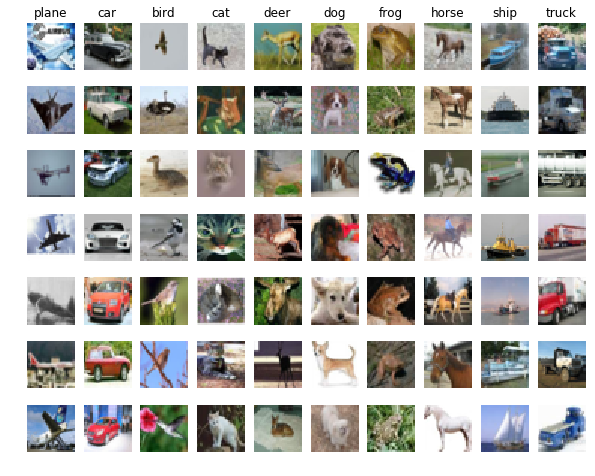

In [4]:
from dl4cv.data_utils import load_CIFAR10
from dl4cv.vis_utils import visualize_cifar10

def get_CIFAR10_data(num_training=48000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for feature extraction and training.
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'datasets/'
    X, y = load_CIFAR10(cifar10_dir)
    

    # Our training set will be the first num_train points from the original
    # training set.
    mask = range(num_training)
    X_train = X[mask]
    y_train = y[mask]
    
    # Our validation set will be num_validation points from the original
    # training set.
    mask = range(num_training, num_training + num_validation)
    X_val = X[mask]
    y_val = y[mask]
    
    # We use a small subset of the training set as our test set.
    mask = range(num_training + num_validation, num_training + num_validation + num_test)
    X_test = X[mask]
    y_test = y[mask]

    return X, y, X_train, y_train, X_val, y_val, X_test, y_test

# Invoke the above function to get our data.
X_raw, y_raw, X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

# visualize raw data
visualize_cifar10(X_raw, y_raw)

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [5]:
from dl4cv.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 48000 images


Done extracting features for 2000 / 48000 images


Done extracting features for 3000 / 48000 images


Done extracting features for 4000 / 48000 images


Done extracting features for 5000 / 48000 images


Done extracting features for 6000 / 48000 images


Done extracting features for 7000 / 48000 images


Done extracting features for 8000 / 48000 images


Done extracting features for 9000 / 48000 images


Done extracting features for 10000 / 48000 images


Done extracting features for 11000 / 48000 images


Done extracting features for 12000 / 48000 images


Done extracting features for 13000 / 48000 images


Done extracting features for 14000 / 48000 images


Done extracting features for 15000 / 48000 images


Done extracting features for 16000 / 48000 images


Done extracting features for 17000 / 48000 images


Done extracting features for 18000 / 48000 images


Done extracting features for 19000 / 48000 images


Done extracting features for 20000 / 48000 images


Done extracting features for 21000 / 48000 images


Done extracting features for 22000 / 48000 images


Done extracting features for 23000 / 48000 images


Done extracting features for 24000 / 48000 images


Done extracting features for 25000 / 48000 images


Done extracting features for 26000 / 48000 images


Done extracting features for 27000 / 48000 images


Done extracting features for 28000 / 48000 images


Done extracting features for 29000 / 48000 images


Done extracting features for 30000 / 48000 images


Done extracting features for 31000 / 48000 images


Done extracting features for 32000 / 48000 images


Done extracting features for 33000 / 48000 images


Done extracting features for 34000 / 48000 images


Done extracting features for 35000 / 48000 images


Done extracting features for 36000 / 48000 images


Done extracting features for 37000 / 48000 images


Done extracting features for 38000 / 48000 images


Done extracting features for 39000 / 48000 images


Done extracting features for 40000 / 48000 images


Done extracting features for 41000 / 48000 images


Done extracting features for 42000 / 48000 images


Done extracting features for 43000 / 48000 images


Done extracting features for 44000 / 48000 images


Done extracting features for 45000 / 48000 images


Done extracting features for 46000 / 48000 images


Done extracting features for 47000 / 48000 images


## Train a Softmax classifier on features
Using the multiclass Softmax code developed earlier in the assignment, train a Softmax classifier on top of the features extracted above; this should achieve better results than training the classifier directly on top of raw pixels.

In [6]:
# Use the validation set to tune the learning rate and regularization strength

from dl4cv.classifiers.linear_classifier import Softmax
import time
learning_rates = [2.15e-6]#[1e-9, 1e-8, 1e-7]
regularization_strengths = [8e2]#[1e3, 1e4, 1e5]

results = {}
best_val = -1
best_softmax = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the Softmax; save#
# the best trained classifer in best_softmax. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
#pass

best_vals = (0,0)
best_key = (0,0)
for i in range(len(learning_rates)):
    for j in range(len(regularization_strengths)):

        softmax = Softmax()
        tic = time.time()
        loss_hist = softmax.train(X_train_feats, y_train, learning_rates[i], regularization_strengths[j],
                              num_iters=4000, verbose=True)
        toc = time.time()
        print 'That took %fs' % (toc - tic)        
        
        y_train_pred = softmax.predict(X_train_feats)
        #print 'training accuracy: %f' % (np.mean(y_train == y_train_pred), )
        y_val_pred = softmax.predict(X_val_feats)
        #print 'validation accuracy: %f' % (np.mean(y_val == y_val_pred), )
        
        results[(learning_rates[i],regularization_strengths[j])] = (np.mean(y_train == y_train_pred),np.mean(y_val == y_val_pred))
        if(best_vals[1] < results[(learning_rates[i],regularization_strengths[j])][1]):
            best_vals = results[(learning_rates[i],regularization_strengths[j])]
            best_key = (learning_rates[i],regularization_strengths[j])
            best_softmax = softmax


print(results.values())


best_val=best_vals[1]
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during validation: %f' % best_val

iteration 0 / 4000: loss 2.961351


iteration 100 / 4000: loss 2.769788


iteration 200 / 4000: loss 2.633516


iteration 300 / 4000: loss 2.536903


iteration 400 / 4000: loss 2.468545


iteration 500 / 4000: loss 2.419701


iteration 600 / 4000: loss 2.385726


iteration 700 / 4000: loss 2.361005


iteration 800 / 4000: loss 2.344197


iteration 900 / 4000: loss 2.331701


iteration 1000 / 4000: loss 2.322896


iteration 1100 / 4000: loss 2.317065


iteration 1200 / 4000: loss 2.312639


iteration 1300 / 4000: loss 2.309448


iteration 1400 / 4000: loss 2.307585


iteration 1500 / 4000: loss 2.305881


iteration 1600 / 4000: loss 2.304830


iteration 1700 / 4000: loss 2.304174


iteration 1800 / 4000: loss 2.303672


iteration 1900 / 4000: loss 2.303016


iteration 2000 / 4000: loss 2.302739


iteration 2100 / 4000: loss 2.302462


iteration 2200 / 4000: loss 2.302589


iteration 2300 / 4000: loss 2.302401


iteration 2400 / 4000: loss 2.302349


iteration 2500 / 4000: loss 2.302261


iteration 2600 / 4000: loss 2.302210


iteration 2700 / 4000: loss 2.302215


iteration 2800 / 4000: loss 2.302175


iteration 2900 / 4000: loss 2.302222


iteration 3000 / 4000: loss 2.302142


iteration 3100 / 4000: loss 2.301996


iteration 3200 / 4000: loss 2.302108


iteration 3300 / 4000: loss 2.302107


iteration 3400 / 4000: loss 2.302221


iteration 3500 / 4000: loss 2.302069


iteration 3600 / 4000: loss 2.302186


iteration 3700 / 4000: loss 2.302117


iteration 3800 / 4000: loss 2.302204


iteration 3900 / 4000: loss 2.302146


That took 19.127100s
[(0.41460416666666666, 0.41999999999999998)]
lr 2.150000e-06 reg 8.000000e+02 train accuracy: 0.414604 val accuracy: 0.420000
best validation accuracy achieved during validation: 0.420000


In [13]:
# Evaluate your trained classifier on the test set
y_test_pred = best_softmax.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.405


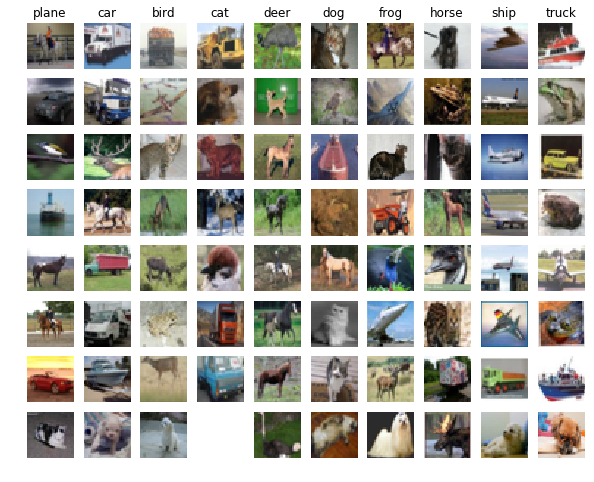

In [8]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    if len(idxs) > 0:
        idxs = np.random.choice(idxs, min(examples_per_class, len(idxs)), replace=False)
    else:
        idxs = []
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

**Your answer:** *Fill this in*

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set.

Note that in the neural net class we have used explicit biases. In the preprocessing of this exercise we have also added a bias dimension to the input, such that we don't have to consider an explicit bias in the linear classifier above. The neural net therefore has an additional parameter in the first layer (the additional bias term), which after all does not matter, as both bias terms can be learned. So just don't get confused by this.

In [25]:
print X_train_feats.shape
print X_train.shape

(48000, 155)
(48000, 32, 32, 3)


In [31]:
from dl4cv.classifiers.neural_net import TwoLayerNet
from dl4cv.data_utils import cartesian
import time

# Preprocessing: reshape the image data into rows
#X_train_reshaped = np.reshape(X_train, (X_train.shape[0], -1))
#X_val_reshaped = np.reshape(X_val, (X_val.shape[0], -1))
#X_test = np.reshape(X_test, (X_test.shape[0], -1))
#X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# Normalize the data: subtract the mean image
#mean_image = np.mean(X_train_reshaped, axis = 0)
#X_train_reshaped -= mean_image
#X_val_reshaped -= mean_image
#X_test -= mean_image
#X_dev -= mean_image

#X_train_complete = np.column_stack((X_train_reshaped,X_train_feats))
#X_val_complete = np.column_stack((X_val_reshaped,X_val_feats))

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

nnet = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
#pass

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1
#learning_rates = [1e-7, 5e-7]
#regularization_strengths = [5e4, 1e5]
learning_rates = [2,1.2,1,0.9]#[1e-10,5e-10,1e-9,5e-9,1e-8,5e-8,1e-7,5e-7]
regularization_strengths = [0.1,0.01,0.001]#[1e1,5e1,1e2,5e2,1e3,5e3,1e4,5e4,1e5,5e5]
learning_rate_decay = [0.95,0.75,0.55]

hyperparameters=cartesian((learning_rates,learning_rate_decay,regularization_strengths))
hyp = np.zeros(hyperparameters.shape[1])

best_vals = (0,0)
best_key = (0,0)
for i in range(len(hyperparameters)):
    
    hyp = hyperparameters[i]

    #Initialize Net

    #nnet = TwoLayerNet(input_size, hidden_size, num_classes)

    #Start Timer
    tic = time.time()

    # Train the network
    stats = nnet.train(X_train_feats, y_train, X_val_feats, y_val, num_iters=4000, batch_size=200, 
                       learning_rate=hyp[0], learning_rate_decay=hyp[1], reg=hyp[2], verbose=True)

    #Stop Timer
    toc = time.time()
    print 'That took %fs' % (toc - tic)

    # Predict on the validation set
    train_accuracy = (nnet.predict(X_train_feats) == y_train).mean()
    val_acc = (nnet.predict(X_val_feats) == y_val).mean()
    print 'Validation accuracy: ', val_acc
    print('Hyperparameter', hyp)




    #y_train_pred = softmax.predict(X_train)
    #print 'training accuracy: %f' % (np.mean(y_train == y_train_pred), )
    #y_val_pred = softmax.predict(X_val)
    #print 'validation accuracy: %f' % (np.mean(y_val == y_val_pred), )

    results[(hyp[0],hyp[1],hyp[2])] = train_accuracy,val_acc
    if(best_vals[1] < results[(hyp[0],hyp[1],hyp[2])][1]):
        best_vals = train_accuracy,val_acc
        best_key = (hyp[0],hyp[1],hyp[2])
        best_net = nnet


print(results)


best_val=best_vals[1]
################################################################################
print 'best validation accuracy achieved during validation: %f' % best_val
print('best keys : ',best_key)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

('iterations_per_epoch', 240)
iteration 0 / 4000: loss 2.302627


iteration 100 / 4000: loss 2.224189


iteration 200 / 4000: loss 2.134305


iteration 300 / 4000: loss 2.149280


iteration 400 / 4000: loss 2.179246


iteration 500 / 4000: loss 2.144061


iteration 600 / 4000: loss 2.199497


iteration 700 / 4000: loss 2.208417


iteration 800 / 4000: loss 2.100506


iteration 900 / 4000: loss 2.136181


iteration 1000 / 4000: loss 2.104853


iteration 1100 / 4000: loss 2.108440


iteration 1200 / 4000: loss 2.132957


iteration 1300 / 4000: loss 2.149489


iteration 1400 / 4000: loss 2.197828


iteration 1500 / 4000: loss 2.099654


iteration 1600 / 4000: loss 2.087701


iteration 1700 / 4000: loss 2.154488


iteration 1800 / 4000: loss 2.053835


iteration 1900 / 4000: loss 2.082518


iteration 2000 / 4000: loss 2.188357


iteration 2100 / 4000: loss 2.118252


iteration 2200 / 4000: loss 2.119525


iteration 2300 / 4000: loss 2.115826


iteration 2400 / 4000: loss 2.086969


iteration 2500 / 4000: loss 2.112879


iteration 2600 / 4000: loss 2.073436


iteration 2700 / 4000: loss 2.100262


iteration 2800 / 4000: loss 2.161111


iteration 2900 / 4000: loss 2.080743


iteration 3000 / 4000: loss 2.097349


iteration 3100 / 4000: loss 2.118453


iteration 3200 / 4000: loss 2.069377


iteration 3300 / 4000: loss 2.033999


iteration 3400 / 4000: loss 2.058735


iteration 3500 / 4000: loss 2.095003


iteration 3600 / 4000: loss 2.132888


iteration 3700 / 4000: loss 2.066226


iteration 3800 / 4000: loss 2.135400


iteration 3900 / 4000: loss 2.118434


That took 86.701025s


Validation accuracy:  0.397
('Hyperparameter', array([ 2.  ,  0.95,  0.1 ]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.744572


iteration 100 / 4000: loss 1.870195


iteration 200 / 4000: loss 1.901289


iteration 300 / 4000: loss 1.666766


iteration 400 / 4000: loss 1.723885


iteration 500 / 4000: loss 1.671702


iteration 600 / 4000: loss 1.879576


iteration 700 / 4000: loss 1.691154


iteration 800 / 4000: loss 1.646958


iteration 900 / 4000: loss 1.807692


iteration 1000 / 4000: loss 1.759711


iteration 1100 / 4000: loss 1.642393


iteration 1200 / 4000: loss 1.646012


iteration 1300 / 4000: loss 1.569781


iteration 1400 / 4000: loss 1.542677


iteration 1500 / 4000: loss 1.747515


iteration 1600 / 4000: loss 1.604669


iteration 1700 / 4000: loss 1.636998


iteration 1800 / 4000: loss 1.629290


iteration 1900 / 4000: loss 1.630224


iteration 2000 / 4000: loss 1.714017


iteration 2100 / 4000: loss 1.697664


iteration 2200 / 4000: loss 1.641664


iteration 2300 / 4000: loss 1.786153


iteration 2400 / 4000: loss 1.762517


iteration 2500 / 4000: loss 1.557658


iteration 2600 / 4000: loss 1.680181


iteration 2700 / 4000: loss 1.607446


iteration 2800 / 4000: loss 1.576445


iteration 2900 / 4000: loss 1.695717


iteration 3000 / 4000: loss 1.491308


iteration 3100 / 4000: loss 1.607567


iteration 3200 / 4000: loss 1.427474


iteration 3300 / 4000: loss 1.552154


iteration 3400 / 4000: loss 1.517922


iteration 3500 / 4000: loss 1.544283


iteration 3600 / 4000: loss 1.408978


iteration 3700 / 4000: loss 1.464270


iteration 3800 / 4000: loss 1.528795


iteration 3900 / 4000: loss 1.444717


That took 82.833271s


Validation accuracy:  0.512
('Hyperparameter', array([ 2.  ,  0.95,  0.01]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.348666


iteration 100 / 4000: loss 1.373971


iteration 200 / 4000: loss 1.446712


iteration 300 / 4000: loss 1.302814


iteration 400 / 4000: loss 1.426823


iteration 500 / 4000: loss 1.354951


iteration 600 / 4000: loss 1.593017


iteration 700 / 4000: loss 1.386417


iteration 800 / 4000: loss 1.482194


iteration 900 / 4000: loss 1.410917


iteration 1000 / 4000: loss 1.429928


iteration 1100 / 4000: loss 1.447355


iteration 1200 / 4000: loss 1.375148


iteration 1300 / 4000: loss 1.309691


iteration 1400 / 4000: loss 1.357146


iteration 1500 / 4000: loss 1.300093


iteration 1600 / 4000: loss 1.203824


iteration 1700 / 4000: loss 1.438102


iteration 1800 / 4000: loss 1.370168


iteration 1900 / 4000: loss 1.324696


iteration 2000 / 4000: loss 1.157796


iteration 2100 / 4000: loss 1.334365


iteration 2200 / 4000: loss 1.292066


iteration 2300 / 4000: loss 1.267163


iteration 2400 / 4000: loss 1.296643


iteration 2500 / 4000: loss 1.251499


iteration 2600 / 4000: loss 1.308194


iteration 2700 / 4000: loss 1.207024


iteration 2800 / 4000: loss 1.130488


iteration 2900 / 4000: loss 1.213792


iteration 3000 / 4000: loss 1.174932


iteration 3100 / 4000: loss 1.225146


iteration 3200 / 4000: loss 1.130005


iteration 3300 / 4000: loss 1.034172


iteration 3400 / 4000: loss 1.222899


iteration 3500 / 4000: loss 1.039851


iteration 3600 / 4000: loss 1.120069


iteration 3700 / 4000: loss 1.082474


iteration 3800 / 4000: loss 1.114525


iteration 3900 / 4000: loss 1.143849


That took 77.792543s


Validation accuracy:  0.566
('Hyperparameter', array([  2.00000000e+00,   9.50000000e-01,   1.00000000e-03]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 34.648275


iteration 100 / 4000: loss 2.130627


iteration 200 / 4000: loss 2.183278


iteration 300 / 4000: loss 2.091167


iteration 400 / 4000: loss 2.085948


iteration 500 / 4000: loss 2.053740


iteration 600 / 4000: loss 2.111089


iteration 700 / 4000: loss 2.122342


iteration 800 / 4000: loss 2.138741


iteration 900 / 4000: loss 2.107612


iteration 1000 / 4000: loss 2.033695


iteration 1100 / 4000: loss 2.067183


iteration 1200 / 4000: loss 2.033439


iteration 1300 / 4000: loss 2.059595


iteration 1400 / 4000: loss 2.043295


iteration 1500 / 4000: loss 2.026403


iteration 1600 / 4000: loss 2.004391


iteration 1700 / 4000: loss 2.063472


iteration 1800 / 4000: loss 2.051093


iteration 1900 / 4000: loss 2.057809


iteration 2000 / 4000: loss 2.051521


iteration 2100 / 4000: loss 2.040173


iteration 2200 / 4000: loss 2.085070


iteration 2300 / 4000: loss 1.975726


iteration 2400 / 4000: loss 1.984894


iteration 2500 / 4000: loss 2.073312


iteration 2600 / 4000: loss 1.989180


iteration 2700 / 4000: loss 2.040788


iteration 2800 / 4000: loss 2.059663


iteration 2900 / 4000: loss 1.990811


iteration 3000 / 4000: loss 2.093087


iteration 3100 / 4000: loss 2.053325


iteration 3200 / 4000: loss 2.038907


iteration 3300 / 4000: loss 2.085866


iteration 3400 / 4000: loss 2.046808


iteration 3500 / 4000: loss 1.981948


iteration 3600 / 4000: loss 2.065778


iteration 3700 / 4000: loss 2.007157


iteration 3800 / 4000: loss 2.076895


iteration 3900 / 4000: loss 2.091605


That took 87.399902s


Validation accuracy:  0.45
('Hyperparameter', array([ 2.  ,  0.75,  0.1 ]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.718840


iteration 100 / 4000: loss 1.715309


iteration 200 / 4000: loss 1.561087


iteration 300 / 4000: loss 1.567143


iteration 400 / 4000: loss 1.586150


iteration 500 / 4000: loss 1.558349


iteration 600 / 4000: loss 1.620083


iteration 700 / 4000: loss 1.477833


iteration 800 / 4000: loss 1.541878


iteration 900 / 4000: loss 1.572162


iteration 1000 / 4000: loss 1.564474


iteration 1100 / 4000: loss 1.426028


iteration 1200 / 4000: loss 1.340517


iteration 1300 / 4000: loss 1.537229


iteration 1400 / 4000: loss 1.461623


iteration 1500 / 4000: loss 1.481002


iteration 1600 / 4000: loss 1.526240


iteration 1700 / 4000: loss 1.466332


iteration 1800 / 4000: loss 1.341978


iteration 1900 / 4000: loss 1.430869


iteration 2000 / 4000: loss 1.351934


iteration 2100 / 4000: loss 1.427098


iteration 2200 / 4000: loss 1.614582


iteration 2300 / 4000: loss 1.420628


iteration 2400 / 4000: loss 1.358336


iteration 2500 / 4000: loss 1.356428


iteration 2600 / 4000: loss 1.384384


iteration 2700 / 4000: loss 1.526440


iteration 2800 / 4000: loss 1.418435


iteration 2900 / 4000: loss 1.488638


iteration 3000 / 4000: loss 1.347483


iteration 3100 / 4000: loss 1.459772


iteration 3200 / 4000: loss 1.322965


iteration 3300 / 4000: loss 1.440046


iteration 3400 / 4000: loss 1.344636


iteration 3500 / 4000: loss 1.488353


iteration 3600 / 4000: loss 1.450003


iteration 3700 / 4000: loss 1.419673


iteration 3800 / 4000: loss 1.417666


iteration 3900 / 4000: loss 1.470647


That took 87.434992s


Validation accuracy:  0.571
('Hyperparameter', array([ 2.  ,  0.75,  0.01]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.217119


iteration 100 / 4000: loss 1.429169


iteration 200 / 4000: loss 1.463280


iteration 300 / 4000: loss 1.111079


iteration 400 / 4000: loss 1.266450


iteration 500 / 4000: loss 1.158673


iteration 600 / 4000: loss 1.115008


iteration 700 / 4000: loss 1.011578


iteration 800 / 4000: loss 1.052374


iteration 900 / 4000: loss 1.039012


iteration 1000 / 4000: loss 0.893460


iteration 1100 / 4000: loss 1.160776


iteration 1200 / 4000: loss 1.060829


iteration 1300 / 4000: loss 0.904373


iteration 1400 / 4000: loss 0.982535


iteration 1500 / 4000: loss 0.914055


iteration 1600 / 4000: loss 0.965717


iteration 1700 / 4000: loss 0.889535


iteration 1800 / 4000: loss 0.918911


iteration 1900 / 4000: loss 0.925374


iteration 2000 / 4000: loss 0.934454


iteration 2100 / 4000: loss 0.778216


iteration 2200 / 4000: loss 0.827102


iteration 2300 / 4000: loss 0.828348


iteration 2400 / 4000: loss 0.900972


iteration 2500 / 4000: loss 0.901601


iteration 2600 / 4000: loss 0.917851


iteration 2700 / 4000: loss 0.817879


iteration 2800 / 4000: loss 0.825834


iteration 2900 / 4000: loss 0.771073


iteration 3000 / 4000: loss 0.904111


iteration 3100 / 4000: loss 0.802297


iteration 3200 / 4000: loss 0.728364


iteration 3300 / 4000: loss 0.819443


iteration 3400 / 4000: loss 0.871002


iteration 3500 / 4000: loss 0.806059


iteration 3600 / 4000: loss 0.790689


iteration 3700 / 4000: loss 0.767549


iteration 3800 / 4000: loss 0.830283


iteration 3900 / 4000: loss 0.757875


That took 78.787300s


Validation accuracy:  0.591
('Hyperparameter', array([  2.00000000e+00,   7.50000000e-01,   1.00000000e-03]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 23.046637


iteration 100 / 4000: loss 2.052211


iteration 200 / 4000: loss 2.178832


iteration 300 / 4000: loss 2.078827


iteration 400 / 4000: loss 2.079040


iteration 500 / 4000: loss 2.067940


iteration 600 / 4000: loss 2.022690


iteration 700 / 4000: loss 2.080806


iteration 800 / 4000: loss 2.096304


iteration 900 / 4000: loss 2.037283


iteration 1000 / 4000: loss 2.026687


iteration 1100 / 4000: loss 2.084285


iteration 1200 / 4000: loss 2.052474


iteration 1300 / 4000: loss 2.070113


iteration 1400 / 4000: loss 2.057386


iteration 1500 / 4000: loss 1.941017


iteration 1600 / 4000: loss 2.068588


iteration 1700 / 4000: loss 2.068763


iteration 1800 / 4000: loss 1.995824


iteration 1900 / 4000: loss 2.012609


iteration 2000 / 4000: loss 2.031716


iteration 2100 / 4000: loss 2.042169


iteration 2200 / 4000: loss 1.995975


iteration 2300 / 4000: loss 2.044376


iteration 2400 / 4000: loss 2.044613


iteration 2500 / 4000: loss 2.018009


iteration 2600 / 4000: loss 1.991091


iteration 2700 / 4000: loss 1.998171


iteration 2800 / 4000: loss 2.061936


iteration 2900 / 4000: loss 2.075729


iteration 3000 / 4000: loss 2.041095


iteration 3100 / 4000: loss 2.035367


iteration 3200 / 4000: loss 2.075817


iteration 3300 / 4000: loss 2.026623


iteration 3400 / 4000: loss 1.967477


iteration 3500 / 4000: loss 2.013563


iteration 3600 / 4000: loss 2.062027


iteration 3700 / 4000: loss 2.049435


iteration 3800 / 4000: loss 2.096323


iteration 3900 / 4000: loss 2.063282


That took 79.105165s


Validation accuracy:  0.457
('Hyperparameter', array([ 2.  ,  0.55,  0.1 ]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.738014


iteration 100 / 4000: loss 1.678347


iteration 200 / 4000: loss 1.667496


iteration 300 / 4000: loss 1.481729


iteration 400 / 4000: loss 1.584511


iteration 500 / 4000: loss 1.443770


iteration 600 / 4000: loss 1.574212


iteration 700 / 4000: loss 1.500068


iteration 800 / 4000: loss 1.566874


iteration 900 / 4000: loss 1.389675


iteration 1000 / 4000: loss 1.445796


iteration 1100 / 4000: loss 1.479274


iteration 1200 / 4000: loss 1.304404


iteration 1300 / 4000: loss 1.360817


iteration 1400 / 4000: loss 1.474995


iteration 1500 / 4000: loss 1.317465


iteration 1600 / 4000: loss 1.415314


iteration 1700 / 4000: loss 1.387477


iteration 1800 / 4000: loss 1.408586


iteration 1900 / 4000: loss 1.460771


iteration 2000 / 4000: loss 1.450788


iteration 2100 / 4000: loss 1.333548


iteration 2200 / 4000: loss 1.374600


iteration 2300 / 4000: loss 1.411820


iteration 2400 / 4000: loss 1.490357


iteration 2500 / 4000: loss 1.450364


iteration 2600 / 4000: loss 1.374874


iteration 2700 / 4000: loss 1.369538


iteration 2800 / 4000: loss 1.438721


iteration 2900 / 4000: loss 1.480908


iteration 3000 / 4000: loss 1.356768


iteration 3100 / 4000: loss 1.343793


iteration 3200 / 4000: loss 1.362844


iteration 3300 / 4000: loss 1.409460


iteration 3400 / 4000: loss 1.347318


iteration 3500 / 4000: loss 1.376657


iteration 3600 / 4000: loss 1.446114


iteration 3700 / 4000: loss 1.421164


iteration 3800 / 4000: loss 1.344292


iteration 3900 / 4000: loss 1.474357


That took 80.450153s


Validation accuracy:  0.557
('Hyperparameter', array([ 2.  ,  0.55,  0.01]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.271410


iteration 100 / 4000: loss 1.390200


iteration 200 / 4000: loss 1.141379


iteration 300 / 4000: loss 1.153235


iteration 400 / 4000: loss 1.150996


iteration 500 / 4000: loss 1.088022


iteration 600 / 4000: loss 1.083671


iteration 700 / 4000: loss 0.996549


iteration 800 / 4000: loss 1.132734


iteration 900 / 4000: loss 1.073341


iteration 1000 / 4000: loss 0.929165


iteration 1100 / 4000: loss 1.099334


iteration 1200 / 4000: loss 1.069960


iteration 1300 / 4000: loss 0.995893


iteration 1400 / 4000: loss 0.939439


iteration 1500 / 4000: loss 0.810256


iteration 1600 / 4000: loss 0.953756


iteration 1700 / 4000: loss 1.008781


iteration 1800 / 4000: loss 0.914847


iteration 1900 / 4000: loss 0.967825


iteration 2000 / 4000: loss 0.848256


iteration 2100 / 4000: loss 1.062890


iteration 2200 / 4000: loss 0.943415


iteration 2300 / 4000: loss 0.977906


iteration 2400 / 4000: loss 0.961976


iteration 2500 / 4000: loss 0.989007


iteration 2600 / 4000: loss 1.027872


iteration 2700 / 4000: loss 0.855031


iteration 2800 / 4000: loss 0.908214


iteration 2900 / 4000: loss 0.984907


iteration 3000 / 4000: loss 1.010360


iteration 3100 / 4000: loss 1.045558


iteration 3200 / 4000: loss 1.024606


iteration 3300 / 4000: loss 1.003644


iteration 3400 / 4000: loss 1.088566


iteration 3500 / 4000: loss 0.960414


iteration 3600 / 4000: loss 0.947271


iteration 3700 / 4000: loss 1.028613


iteration 3800 / 4000: loss 1.005094


iteration 3900 / 4000: loss 1.081249


That took 82.390735s


Validation accuracy:  0.617
('Hyperparameter', array([  2.00000000e+00,   5.50000000e-01,   1.00000000e-03]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 12.821414


iteration 100 / 4000: loss 2.078489


iteration 200 / 4000: loss 2.065824


iteration 300 / 4000: loss 2.083808


iteration 400 / 4000: loss 2.122453


iteration 500 / 4000: loss 2.110199


iteration 600 / 4000: loss 2.061943


iteration 700 / 4000: loss 2.072712


iteration 800 / 4000: loss 2.050029


iteration 900 / 4000: loss 2.114803


iteration 1000 / 4000: loss 2.102411


iteration 1100 / 4000: loss 2.035461


iteration 1200 / 4000: loss 2.108240


iteration 1300 / 4000: loss 2.079865


iteration 1400 / 4000: loss 1.934192


iteration 1500 / 4000: loss 2.057333


iteration 1600 / 4000: loss 2.126129


iteration 1700 / 4000: loss 2.044376


iteration 1800 / 4000: loss 2.112820


iteration 1900 / 4000: loss 2.173134


iteration 2000 / 4000: loss 2.073264


iteration 2100 / 4000: loss 2.083038


iteration 2200 / 4000: loss 2.099680


iteration 2300 / 4000: loss 2.073515


iteration 2400 / 4000: loss 2.011892


iteration 2500 / 4000: loss 2.089063


iteration 2600 / 4000: loss 2.082168


iteration 2700 / 4000: loss 2.056461


iteration 2800 / 4000: loss 2.055734


iteration 2900 / 4000: loss 2.010037


iteration 3000 / 4000: loss 2.079115


iteration 3100 / 4000: loss 2.085768


iteration 3200 / 4000: loss 2.059983


iteration 3300 / 4000: loss 2.079509


iteration 3400 / 4000: loss 2.134021


iteration 3500 / 4000: loss 2.109583


iteration 3600 / 4000: loss 2.109299


iteration 3700 / 4000: loss 2.052485


iteration 3800 / 4000: loss 2.090501


iteration 3900 / 4000: loss 2.045621


That took 80.773496s


Validation accuracy:  0.448
('Hyperparameter', array([ 1.2 ,  0.95,  0.1 ]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.777298


iteration 100 / 4000: loss 1.626919


iteration 200 / 4000: loss 1.700842


iteration 300 / 4000: loss 1.674003


iteration 400 / 4000: loss 1.545090


iteration 500 / 4000: loss 1.595473


iteration 600 / 4000: loss 1.741662


iteration 700 / 4000: loss 1.580032


iteration 800 / 4000: loss 1.550475


iteration 900 / 4000: loss 1.495756


iteration 1000 / 4000: loss 1.606331


iteration 1100 / 4000: loss 1.515316


iteration 1200 / 4000: loss 1.527277


iteration 1300 / 4000: loss 1.535487


iteration 1400 / 4000: loss 1.561261


iteration 1500 / 4000: loss 1.688956


iteration 1600 / 4000: loss 1.572540


iteration 1700 / 4000: loss 1.439319


iteration 1800 / 4000: loss 1.649414


iteration 1900 / 4000: loss 1.483907


iteration 2000 / 4000: loss 1.535374


iteration 2100 / 4000: loss 1.571018


iteration 2200 / 4000: loss 1.479578


iteration 2300 / 4000: loss 1.525182


iteration 2400 / 4000: loss 1.407419


iteration 2500 / 4000: loss 1.489222


iteration 2600 / 4000: loss 1.605951


iteration 2700 / 4000: loss 1.585174


iteration 2800 / 4000: loss 1.526124


iteration 2900 / 4000: loss 1.533345


iteration 3000 / 4000: loss 1.470935


iteration 3100 / 4000: loss 1.493540


iteration 3200 / 4000: loss 1.545021


iteration 3300 / 4000: loss 1.549155


iteration 3400 / 4000: loss 1.592122


iteration 3500 / 4000: loss 1.458138


iteration 3600 / 4000: loss 1.444638


iteration 3700 / 4000: loss 1.386811


iteration 3800 / 4000: loss 1.539021


iteration 3900 / 4000: loss 1.380978


That took 82.424793s


Validation accuracy:  0.543
('Hyperparameter', array([ 1.2 ,  0.95,  0.01]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.289652


iteration 100 / 4000: loss 1.376948


iteration 200 / 4000: loss 1.297897


iteration 300 / 4000: loss 1.290840


iteration 400 / 4000: loss 1.137360


iteration 500 / 4000: loss 1.319407


iteration 600 / 4000: loss 1.344712


iteration 700 / 4000: loss 1.307372


iteration 800 / 4000: loss 1.070524


iteration 900 / 4000: loss 1.220834


iteration 1000 / 4000: loss 1.051818


iteration 1100 / 4000: loss 1.139444


iteration 1200 / 4000: loss 1.231033


iteration 1300 / 4000: loss 1.018619


iteration 1400 / 4000: loss 1.160492


iteration 1500 / 4000: loss 1.183169


iteration 1600 / 4000: loss 1.093920


iteration 1700 / 4000: loss 0.978452


iteration 1800 / 4000: loss 1.170077


iteration 1900 / 4000: loss 1.138528


iteration 2000 / 4000: loss 0.975204


iteration 2100 / 4000: loss 1.101356


iteration 2200 / 4000: loss 1.010206


iteration 2300 / 4000: loss 1.070444


iteration 2400 / 4000: loss 1.005787


iteration 2500 / 4000: loss 1.029603


iteration 2600 / 4000: loss 0.979693


iteration 2700 / 4000: loss 1.054330


iteration 2800 / 4000: loss 0.893570


iteration 2900 / 4000: loss 0.974797


iteration 3000 / 4000: loss 1.018353


iteration 3100 / 4000: loss 0.889828


iteration 3200 / 4000: loss 0.955599


iteration 3300 / 4000: loss 1.035515


iteration 3400 / 4000: loss 1.050792


iteration 3500 / 4000: loss 0.989354


iteration 3600 / 4000: loss 0.910016


iteration 3700 / 4000: loss 1.029292


iteration 3800 / 4000: loss 0.899486


iteration 3900 / 4000: loss 1.021444


That took 81.153655s


Validation accuracy:  0.576
('Hyperparameter', array([  1.20000000e+00,   9.50000000e-01,   1.00000000e-03]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 31.692122


iteration 100 / 4000: loss 2.098394


iteration 200 / 4000: loss 2.069659


iteration 300 / 4000: loss 2.029801


iteration 400 / 4000: loss 2.096308


iteration 500 / 4000: loss 2.113623


iteration 600 / 4000: loss 2.057485


iteration 700 / 4000: loss 2.007790


iteration 800 / 4000: loss 2.101065


iteration 900 / 4000: loss 2.000905


iteration 1000 / 4000: loss 2.051814


iteration 1100 / 4000: loss 1.982272


iteration 1200 / 4000: loss 2.056153


iteration 1300 / 4000: loss 2.054040


iteration 1400 / 4000: loss 2.060832


iteration 1500 / 4000: loss 2.013253


iteration 1600 / 4000: loss 2.056286


iteration 1700 / 4000: loss 1.987454


iteration 1800 / 4000: loss 2.020445


iteration 1900 / 4000: loss 2.038900


iteration 2000 / 4000: loss 1.984188


iteration 2100 / 4000: loss 2.089222


iteration 2200 / 4000: loss 2.025204


iteration 2300 / 4000: loss 2.089494


iteration 2400 / 4000: loss 2.058768


iteration 2500 / 4000: loss 2.064094


iteration 2600 / 4000: loss 2.029310


iteration 2700 / 4000: loss 2.042141


iteration 2800 / 4000: loss 2.099171


iteration 2900 / 4000: loss 2.096389


iteration 3000 / 4000: loss 2.019460


iteration 3100 / 4000: loss 2.111718


iteration 3200 / 4000: loss 2.028391


iteration 3300 / 4000: loss 2.025958


iteration 3400 / 4000: loss 2.014380


iteration 3500 / 4000: loss 2.122376


iteration 3600 / 4000: loss 2.001024


iteration 3700 / 4000: loss 2.061196


iteration 3800 / 4000: loss 2.061501


iteration 3900 / 4000: loss 1.982848


That took 86.127726s


Validation accuracy:  0.457
('Hyperparameter', array([ 1.2 ,  0.75,  0.1 ]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.712146


iteration 100 / 4000: loss 1.585668


iteration 200 / 4000: loss 1.515718


iteration 300 / 4000: loss 1.424506


iteration 400 / 4000: loss 1.554097


iteration 500 / 4000: loss 1.498443


iteration 600 / 4000: loss 1.462348


iteration 700 / 4000: loss 1.479480


iteration 800 / 4000: loss 1.476536


iteration 900 / 4000: loss 1.417457


iteration 1000 / 4000: loss 1.433850


iteration 1100 / 4000: loss 1.362627


iteration 1200 / 4000: loss 1.433939


iteration 1300 / 4000: loss 1.473264


iteration 1400 / 4000: loss 1.501445


iteration 1500 / 4000: loss 1.498234


iteration 1600 / 4000: loss 1.352748


iteration 1700 / 4000: loss 1.447276


iteration 1800 / 4000: loss 1.610425


iteration 1900 / 4000: loss 1.351200


iteration 2000 / 4000: loss 1.329753


iteration 2100 / 4000: loss 1.338218


iteration 2200 / 4000: loss 1.554496


iteration 2300 / 4000: loss 1.451282


iteration 2400 / 4000: loss 1.305172


iteration 2500 / 4000: loss 1.333006


iteration 2600 / 4000: loss 1.402374


iteration 2700 / 4000: loss 1.411507


iteration 2800 / 4000: loss 1.506846


iteration 2900 / 4000: loss 1.362215


iteration 3000 / 4000: loss 1.381361


iteration 3100 / 4000: loss 1.378555


iteration 3200 / 4000: loss 1.553096


iteration 3300 / 4000: loss 1.406622


iteration 3400 / 4000: loss 1.401615


iteration 3500 / 4000: loss 1.345376


iteration 3600 / 4000: loss 1.393951


iteration 3700 / 4000: loss 1.325591


iteration 3800 / 4000: loss 1.392978


iteration 3900 / 4000: loss 1.349368


That took 81.827883s


Validation accuracy:  0.563
('Hyperparameter', array([ 1.2 ,  0.75,  0.01]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.324892


iteration 100 / 4000: loss 1.463154


iteration 200 / 4000: loss 1.057530


iteration 300 / 4000: loss 1.174040


iteration 400 / 4000: loss 1.138644


iteration 500 / 4000: loss 1.159846


iteration 600 / 4000: loss 1.007555


iteration 700 / 4000: loss 1.228808


iteration 800 / 4000: loss 1.079130


iteration 900 / 4000: loss 1.109404


iteration 1000 / 4000: loss 0.969009


iteration 1100 / 4000: loss 1.064346


iteration 1200 / 4000: loss 1.023102


iteration 1300 / 4000: loss 1.053170


iteration 1400 / 4000: loss 0.940463


iteration 1500 / 4000: loss 0.916825


iteration 1600 / 4000: loss 1.085874


iteration 1700 / 4000: loss 0.906933


iteration 1800 / 4000: loss 0.831239


iteration 1900 / 4000: loss 0.897650


iteration 2000 / 4000: loss 0.938488


iteration 2100 / 4000: loss 0.858083


iteration 2200 / 4000: loss 0.851280


iteration 2300 / 4000: loss 0.988646


iteration 2400 / 4000: loss 0.925885


iteration 2500 / 4000: loss 0.839368


iteration 2600 / 4000: loss 0.949585


iteration 2700 / 4000: loss 0.850205


iteration 2800 / 4000: loss 0.726113


iteration 2900 / 4000: loss 0.929326


iteration 3000 / 4000: loss 0.901627


iteration 3100 / 4000: loss 0.789628


iteration 3200 / 4000: loss 0.770426


iteration 3300 / 4000: loss 0.891928


iteration 3400 / 4000: loss 0.828162


iteration 3500 / 4000: loss 0.863626


iteration 3600 / 4000: loss 0.896611


iteration 3700 / 4000: loss 0.823318


iteration 3800 / 4000: loss 0.762155


iteration 3900 / 4000: loss 0.974901


That took 79.736872s


Validation accuracy:  0.643
('Hyperparameter', array([  1.20000000e+00,   7.50000000e-01,   1.00000000e-03]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 16.676148


iteration 100 / 4000: loss 1.995315


iteration 200 / 4000: loss 2.087038


iteration 300 / 4000: loss 2.044321


iteration 400 / 4000: loss 2.010132


iteration 500 / 4000: loss 2.024428


iteration 600 / 4000: loss 2.083163


iteration 700 / 4000: loss 2.012612


iteration 800 / 4000: loss 2.051431


iteration 900 / 4000: loss 2.101036


iteration 1000 / 4000: loss 2.027568


iteration 1100 / 4000: loss 2.047883


iteration 1200 / 4000: loss 2.025294


iteration 1300 / 4000: loss 2.054325


iteration 1400 / 4000: loss 2.057957


iteration 1500 / 4000: loss 1.965046


iteration 1600 / 4000: loss 1.990931


iteration 1700 / 4000: loss 2.033043


iteration 1800 / 4000: loss 2.069799


iteration 1900 / 4000: loss 2.063330


iteration 2000 / 4000: loss 2.077045


iteration 2100 / 4000: loss 1.968994


iteration 2200 / 4000: loss 2.093541


iteration 2300 / 4000: loss 2.037913


iteration 2400 / 4000: loss 2.036206


iteration 2500 / 4000: loss 2.013299


iteration 2600 / 4000: loss 2.025997


iteration 2700 / 4000: loss 2.041575


iteration 2800 / 4000: loss 2.054395


iteration 2900 / 4000: loss 2.050949


iteration 3000 / 4000: loss 2.042296


iteration 3100 / 4000: loss 2.021771


iteration 3200 / 4000: loss 2.000820


iteration 3300 / 4000: loss 1.991950


iteration 3400 / 4000: loss 2.021136


iteration 3500 / 4000: loss 2.096753


iteration 3600 / 4000: loss 2.086706


iteration 3700 / 4000: loss 1.988295


iteration 3800 / 4000: loss 2.000553


iteration 3900 / 4000: loss 2.089800


That took 79.001475s


Validation accuracy:  0.448
('Hyperparameter', array([ 1.2 ,  0.55,  0.1 ]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.793501


iteration 100 / 4000: loss 1.531978


iteration 200 / 4000: loss 1.507620


iteration 300 / 4000: loss 1.353733


iteration 400 / 4000: loss 1.485097


iteration 500 / 4000: loss 1.458201


iteration 600 / 4000: loss 1.630542


iteration 700 / 4000: loss 1.486009


iteration 800 / 4000: loss 1.412626


iteration 900 / 4000: loss 1.451732


iteration 1000 / 4000: loss 1.356154


iteration 1100 / 4000: loss 1.442034


iteration 1200 / 4000: loss 1.415797


iteration 1300 / 4000: loss 1.411909


iteration 1400 / 4000: loss 1.456279


iteration 1500 / 4000: loss 1.421323


iteration 1600 / 4000: loss 1.511798


iteration 1700 / 4000: loss 1.412584


iteration 1800 / 4000: loss 1.382752


iteration 1900 / 4000: loss 1.422429


iteration 2000 / 4000: loss 1.356533


iteration 2100 / 4000: loss 1.370612


iteration 2200 / 4000: loss 1.459995


iteration 2300 / 4000: loss 1.478228


iteration 2400 / 4000: loss 1.420519


iteration 2500 / 4000: loss 1.528584


iteration 2600 / 4000: loss 1.428035


iteration 2700 / 4000: loss 1.453624


iteration 2800 / 4000: loss 1.413449


iteration 2900 / 4000: loss 1.510044


iteration 3000 / 4000: loss 1.503616


iteration 3100 / 4000: loss 1.360442


iteration 3200 / 4000: loss 1.388694


iteration 3300 / 4000: loss 1.415499


iteration 3400 / 4000: loss 1.379534


iteration 3500 / 4000: loss 1.446287


iteration 3600 / 4000: loss 1.520225


iteration 3700 / 4000: loss 1.467988


iteration 3800 / 4000: loss 1.447462


iteration 3900 / 4000: loss 1.469398


That took 79.601816s


Validation accuracy:  0.548
('Hyperparameter', array([ 1.2 ,  0.55,  0.01]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.253501


iteration 100 / 4000: loss 1.167207


iteration 200 / 4000: loss 1.268064


iteration 300 / 4000: loss 1.246556


iteration 400 / 4000: loss 1.109906


iteration 500 / 4000: loss 1.114338


iteration 600 / 4000: loss 1.109837


iteration 700 / 4000: loss 1.058037


iteration 800 / 4000: loss 1.162920


iteration 900 / 4000: loss 1.065916


iteration 1000 / 4000: loss 1.066035


iteration 1100 / 4000: loss 1.109542


iteration 1200 / 4000: loss 1.072487


iteration 1300 / 4000: loss 1.105440


iteration 1400 / 4000: loss 1.011458


iteration 1500 / 4000: loss 1.031792


iteration 1600 / 4000: loss 1.033085


iteration 1700 / 4000: loss 0.940359


iteration 1800 / 4000: loss 0.917122


iteration 1900 / 4000: loss 0.931528


iteration 2000 / 4000: loss 1.017274


iteration 2100 / 4000: loss 0.989738


iteration 2200 / 4000: loss 1.067906


iteration 2300 / 4000: loss 1.031956


iteration 2400 / 4000: loss 0.973179


iteration 2500 / 4000: loss 1.036742


iteration 2600 / 4000: loss 1.036877


iteration 2700 / 4000: loss 0.987149


iteration 2800 / 4000: loss 1.063067


iteration 2900 / 4000: loss 1.085388


iteration 3000 / 4000: loss 1.089679


iteration 3100 / 4000: loss 1.089282


iteration 3200 / 4000: loss 1.044367


iteration 3300 / 4000: loss 0.961386


iteration 3400 / 4000: loss 0.976168


iteration 3500 / 4000: loss 1.090140


iteration 3600 / 4000: loss 0.980493


iteration 3700 / 4000: loss 1.202363


iteration 3800 / 4000: loss 0.958426


iteration 3900 / 4000: loss 1.058045


That took 81.130910s


Validation accuracy:  0.608
('Hyperparameter', array([  1.20000000e+00,   5.50000000e-01,   1.00000000e-03]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 8.477864


iteration 100 / 4000: loss 2.100492


iteration 200 / 4000: loss 2.123855


iteration 300 / 4000: loss 2.047442


iteration 400 / 4000: loss 2.096508


iteration 500 / 4000: loss 2.102469


iteration 600 / 4000: loss 2.063868


iteration 700 / 4000: loss 2.030814


iteration 800 / 4000: loss 2.097773


iteration 900 / 4000: loss 2.176784


iteration 1000 / 4000: loss 2.025863


iteration 1100 / 4000: loss 2.011570


iteration 1200 / 4000: loss 2.060234


iteration 1300 / 4000: loss 2.088816


iteration 1400 / 4000: loss 2.073067


iteration 1500 / 4000: loss 2.027343


iteration 1600 / 4000: loss 2.062006


iteration 1700 / 4000: loss 2.050132


iteration 1800 / 4000: loss 2.056832


iteration 1900 / 4000: loss 2.107477


iteration 2000 / 4000: loss 2.063852


iteration 2100 / 4000: loss 2.082336


iteration 2200 / 4000: loss 2.074604


iteration 2300 / 4000: loss 2.114502


iteration 2400 / 4000: loss 2.116945


iteration 2500 / 4000: loss 2.088982


iteration 2600 / 4000: loss 2.092653


iteration 2700 / 4000: loss 2.023477


iteration 2800 / 4000: loss 2.105901


iteration 2900 / 4000: loss 2.048820


iteration 3000 / 4000: loss 2.052329


iteration 3100 / 4000: loss 2.096300


iteration 3200 / 4000: loss 2.140566


iteration 3300 / 4000: loss 2.089267


iteration 3400 / 4000: loss 2.027159


iteration 3500 / 4000: loss 2.062847


iteration 3600 / 4000: loss 2.040679


iteration 3700 / 4000: loss 2.043859


iteration 3800 / 4000: loss 2.036303


iteration 3900 / 4000: loss 2.046156


That took 81.246115s


Validation accuracy:  0.432
('Hyperparameter', array([ 1.  ,  0.95,  0.1 ]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.733572


iteration 100 / 4000: loss 1.601291


iteration 200 / 4000: loss 1.669376


iteration 300 / 4000: loss 1.486628


iteration 400 / 4000: loss 1.471001


iteration 500 / 4000: loss 1.575687


iteration 600 / 4000: loss 1.620474


iteration 700 / 4000: loss 1.457245


iteration 800 / 4000: loss 1.483912


iteration 900 / 4000: loss 1.577974


iteration 1000 / 4000: loss 1.528280


iteration 1100 / 4000: loss 1.587757


iteration 1200 / 4000: loss 1.640730


iteration 1300 / 4000: loss 1.434818


iteration 1400 / 4000: loss 1.625068


iteration 1500 / 4000: loss 1.486324


iteration 1600 / 4000: loss 1.519182


iteration 1700 / 4000: loss 1.586897


iteration 1800 / 4000: loss 1.534217


iteration 1900 / 4000: loss 1.521031


iteration 2000 / 4000: loss 1.450201


iteration 2100 / 4000: loss 1.567152


iteration 2200 / 4000: loss 1.681726


iteration 2300 / 4000: loss 1.467631


iteration 2400 / 4000: loss 1.567373


iteration 2500 / 4000: loss 1.342070


iteration 2600 / 4000: loss 1.586814


iteration 2700 / 4000: loss 1.479976


iteration 2800 / 4000: loss 1.497212


iteration 2900 / 4000: loss 1.495745


iteration 3000 / 4000: loss 1.471070


iteration 3100 / 4000: loss 1.520458


iteration 3200 / 4000: loss 1.433589


iteration 3300 / 4000: loss 1.342217


iteration 3400 / 4000: loss 1.382917


iteration 3500 / 4000: loss 1.428914


iteration 3600 / 4000: loss 1.446040


iteration 3700 / 4000: loss 1.519553


iteration 3800 / 4000: loss 1.453852


iteration 3900 / 4000: loss 1.536395


That took 82.537929s


Validation accuracy:  0.554
('Hyperparameter', array([ 1.  ,  0.95,  0.01]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.259911


iteration 100 / 4000: loss 1.214879


iteration 200 / 4000: loss 1.214770


iteration 300 / 4000: loss 1.204186


iteration 400 / 4000: loss 1.357221


iteration 500 / 4000: loss 1.271003


iteration 600 / 4000: loss 1.201179


iteration 700 / 4000: loss 1.334706


iteration 800 / 4000: loss 1.213699


iteration 900 / 4000: loss 1.106127


iteration 1000 / 4000: loss 1.141865


iteration 1100 / 4000: loss 1.002119


iteration 1200 / 4000: loss 1.113184


iteration 1300 / 4000: loss 0.906869


iteration 1400 / 4000: loss 1.067686


iteration 1500 / 4000: loss 1.222867


iteration 1600 / 4000: loss 1.004909


iteration 1700 / 4000: loss 1.084142


iteration 1800 / 4000: loss 1.039075


iteration 1900 / 4000: loss 1.032933


iteration 2000 / 4000: loss 1.003534


iteration 2100 / 4000: loss 1.054108


iteration 2200 / 4000: loss 0.953865


iteration 2300 / 4000: loss 0.931693


iteration 2400 / 4000: loss 0.957461


iteration 2500 / 4000: loss 0.826303


iteration 2600 / 4000: loss 0.940241


iteration 2700 / 4000: loss 0.951466


iteration 2800 / 4000: loss 0.989940


iteration 2900 / 4000: loss 0.966921


iteration 3000 / 4000: loss 1.003118


iteration 3100 / 4000: loss 0.869581


iteration 3200 / 4000: loss 0.947342


iteration 3300 / 4000: loss 0.878775


iteration 3400 / 4000: loss 0.993931


iteration 3500 / 4000: loss 0.914975


iteration 3600 / 4000: loss 0.888077


iteration 3700 / 4000: loss 0.851367


iteration 3800 / 4000: loss 0.813096


iteration 3900 / 4000: loss 0.888907


That took 78.547912s


Validation accuracy:  0.579
('Hyperparameter', array([ 1.   ,  0.95 ,  0.001]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 30.492575


iteration 100 / 4000: loss 2.093331


iteration 200 / 4000: loss 2.107522


iteration 300 / 4000: loss 2.056134


iteration 400 / 4000: loss 2.075039


iteration 500 / 4000: loss 2.091151


iteration 600 / 4000: loss 2.177083


iteration 700 / 4000: loss 2.036103


iteration 800 / 4000: loss 2.079245


iteration 900 / 4000: loss 2.076440


iteration 1000 / 4000: loss 2.002832


iteration 1100 / 4000: loss 2.043309


iteration 1200 / 4000: loss 1.999641


iteration 1300 / 4000: loss 2.105166


iteration 1400 / 4000: loss 2.000123


iteration 1500 / 4000: loss 2.058587


iteration 1600 / 4000: loss 1.968131


iteration 1700 / 4000: loss 2.018971


iteration 1800 / 4000: loss 1.992264


iteration 1900 / 4000: loss 2.090556


iteration 2000 / 4000: loss 1.996049


iteration 2100 / 4000: loss 2.061576


iteration 2200 / 4000: loss 1.991745


iteration 2300 / 4000: loss 2.082116


iteration 2400 / 4000: loss 2.033598


iteration 2500 / 4000: loss 2.000927


iteration 2600 / 4000: loss 2.055668


iteration 2700 / 4000: loss 1.997397


iteration 2800 / 4000: loss 2.032057


iteration 2900 / 4000: loss 2.046368


iteration 3000 / 4000: loss 2.010754


iteration 3100 / 4000: loss 2.070465


iteration 3200 / 4000: loss 2.068822


iteration 3300 / 4000: loss 2.064639


iteration 3400 / 4000: loss 2.078589


iteration 3500 / 4000: loss 2.054259


iteration 3600 / 4000: loss 1.981752


iteration 3700 / 4000: loss 2.031250


iteration 3800 / 4000: loss 2.095243


iteration 3900 / 4000: loss 2.038373


That took 79.750369s


Validation accuracy:  0.456
('Hyperparameter', array([ 1.  ,  0.75,  0.1 ]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.699050


iteration 100 / 4000: loss 1.523375


iteration 200 / 4000: loss 1.571932


iteration 300 / 4000: loss 1.502738


iteration 400 / 4000: loss 1.489263


iteration 500 / 4000: loss 1.634823


iteration 600 / 4000: loss 1.453188


iteration 700 / 4000: loss 1.531352


iteration 800 / 4000: loss 1.571781


iteration 900 / 4000: loss 1.480041


iteration 1000 / 4000: loss 1.535548


iteration 1100 / 4000: loss 1.452767


iteration 1200 / 4000: loss 1.351605


iteration 1300 / 4000: loss 1.323805


iteration 1400 / 4000: loss 1.383168


iteration 1500 / 4000: loss 1.404485


iteration 1600 / 4000: loss 1.407442


iteration 1700 / 4000: loss 1.404033


iteration 1800 / 4000: loss 1.450300


iteration 1900 / 4000: loss 1.456755


iteration 2000 / 4000: loss 1.336950


iteration 2100 / 4000: loss 1.390660


iteration 2200 / 4000: loss 1.487632


iteration 2300 / 4000: loss 1.531987


iteration 2400 / 4000: loss 1.510678


iteration 2500 / 4000: loss 1.388562


iteration 2600 / 4000: loss 1.372029


iteration 2700 / 4000: loss 1.408477


iteration 2800 / 4000: loss 1.485047


iteration 2900 / 4000: loss 1.439480


iteration 3000 / 4000: loss 1.492574


iteration 3100 / 4000: loss 1.474512


iteration 3200 / 4000: loss 1.553402


iteration 3300 / 4000: loss 1.480437


iteration 3400 / 4000: loss 1.491411


iteration 3500 / 4000: loss 1.448824


iteration 3600 / 4000: loss 1.293138


iteration 3700 / 4000: loss 1.432637


iteration 3800 / 4000: loss 1.415751


iteration 3900 / 4000: loss 1.490846


That took 81.324108s


Validation accuracy:  0.565
('Hyperparameter', array([ 1.  ,  0.75,  0.01]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.208608


iteration 100 / 4000: loss 1.370300


iteration 200 / 4000: loss 1.271719


iteration 300 / 4000: loss 1.060356


iteration 400 / 4000: loss 1.233322


iteration 500 / 4000: loss 0.999951


iteration 600 / 4000: loss 1.100110


iteration 700 / 4000: loss 1.167041


iteration 800 / 4000: loss 1.030156


iteration 900 / 4000: loss 1.076734


iteration 1000 / 4000: loss 1.166903


iteration 1100 / 4000: loss 0.907674


iteration 1200 / 4000: loss 1.106776


iteration 1300 / 4000: loss 0.940421


iteration 1400 / 4000: loss 0.921802


iteration 1500 / 4000: loss 0.882707


iteration 1600 / 4000: loss 0.963512


iteration 1700 / 4000: loss 0.993514


iteration 1800 / 4000: loss 0.992806


iteration 1900 / 4000: loss 0.885584


iteration 2000 / 4000: loss 0.836700


iteration 2100 / 4000: loss 1.001406


iteration 2200 / 4000: loss 0.963836


iteration 2300 / 4000: loss 0.893650


iteration 2400 / 4000: loss 0.904518


iteration 2500 / 4000: loss 0.912263


iteration 2600 / 4000: loss 0.881548


iteration 2700 / 4000: loss 1.094096


iteration 2800 / 4000: loss 1.004530


iteration 2900 / 4000: loss 0.918452


iteration 3000 / 4000: loss 0.862489


iteration 3100 / 4000: loss 0.948200


iteration 3200 / 4000: loss 0.803940


iteration 3300 / 4000: loss 0.859830


iteration 3400 / 4000: loss 0.844243


iteration 3500 / 4000: loss 0.859661


iteration 3600 / 4000: loss 0.879398


iteration 3700 / 4000: loss 0.860360


iteration 3800 / 4000: loss 0.816792


iteration 3900 / 4000: loss 0.849357


That took 88.114593s


Validation accuracy:  0.636
('Hyperparameter', array([ 1.   ,  0.75 ,  0.001]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 14.900399


iteration 100 / 4000: loss 2.093474


iteration 200 / 4000: loss 2.089220


iteration 300 / 4000: loss 2.028241


iteration 400 / 4000: loss 2.055762


iteration 500 / 4000: loss 1.970537


iteration 600 / 4000: loss 2.070926


iteration 700 / 4000: loss 2.084742


iteration 800 / 4000: loss 1.968032


iteration 900 / 4000: loss 2.094853


iteration 1000 / 4000: loss 2.064653


iteration 1100 / 4000: loss 2.033559


iteration 1200 / 4000: loss 2.068715


iteration 1300 / 4000: loss 2.034048


iteration 1400 / 4000: loss 2.074982


iteration 1500 / 4000: loss 1.981943


iteration 1600 / 4000: loss 2.036831


iteration 1700 / 4000: loss 2.078118


iteration 1800 / 4000: loss 1.958495


iteration 1900 / 4000: loss 2.088863


iteration 2000 / 4000: loss 2.095487


iteration 2100 / 4000: loss 2.056578


iteration 2200 / 4000: loss 2.035871


iteration 2300 / 4000: loss 2.030269


iteration 2400 / 4000: loss 1.970739


iteration 2500 / 4000: loss 2.064885


iteration 2600 / 4000: loss 1.941790


iteration 2700 / 4000: loss 2.056876


iteration 2800 / 4000: loss 1.958051


iteration 2900 / 4000: loss 1.989291


iteration 3000 / 4000: loss 2.005179


iteration 3100 / 4000: loss 2.092085


iteration 3200 / 4000: loss 2.000461


iteration 3300 / 4000: loss 2.020077


iteration 3400 / 4000: loss 2.024046


iteration 3500 / 4000: loss 2.103459


iteration 3600 / 4000: loss 2.109456


iteration 3700 / 4000: loss 1.990783


iteration 3800 / 4000: loss 2.033678


iteration 3900 / 4000: loss 2.077960


That took 82.793970s


Validation accuracy:  0.457
('Hyperparameter', array([ 1.  ,  0.55,  0.1 ]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.752686


iteration 100 / 4000: loss 1.548108


iteration 200 / 4000: loss 1.700026


iteration 300 / 4000: loss 1.440459


iteration 400 / 4000: loss 1.529615


iteration 500 / 4000: loss 1.617059


iteration 600 / 4000: loss 1.538582


iteration 700 / 4000: loss 1.522078


iteration 800 / 4000: loss 1.442040


iteration 900 / 4000: loss 1.484269


iteration 1000 / 4000: loss 1.520856


iteration 1100 / 4000: loss 1.505202


iteration 1200 / 4000: loss 1.451903


iteration 1300 / 4000: loss 1.512408


iteration 1400 / 4000: loss 1.554789


iteration 1500 / 4000: loss 1.382106


iteration 1600 / 4000: loss 1.518799


iteration 1700 / 4000: loss 1.386822


iteration 1800 / 4000: loss 1.368627


iteration 1900 / 4000: loss 1.470329


iteration 2000 / 4000: loss 1.477407


iteration 2100 / 4000: loss 1.470250


iteration 2200 / 4000: loss 1.453189


iteration 2300 / 4000: loss 1.419424


iteration 2400 / 4000: loss 1.566967


iteration 2500 / 4000: loss 1.476378


iteration 2600 / 4000: loss 1.351668


iteration 2700 / 4000: loss 1.438778


iteration 2800 / 4000: loss 1.429363


iteration 2900 / 4000: loss 1.371109


iteration 3000 / 4000: loss 1.483321


iteration 3100 / 4000: loss 1.443255


iteration 3200 / 4000: loss 1.355026


iteration 3300 / 4000: loss 1.334306


iteration 3400 / 4000: loss 1.568325


iteration 3500 / 4000: loss 1.440109


iteration 3600 / 4000: loss 1.432463


iteration 3700 / 4000: loss 1.390286


iteration 3800 / 4000: loss 1.420356


iteration 3900 / 4000: loss 1.535570


That took 81.554358s


Validation accuracy:  0.547
('Hyperparameter', array([ 1.  ,  0.55,  0.01]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.231934


iteration 100 / 4000: loss 1.310070


iteration 200 / 4000: loss 1.354067


iteration 300 / 4000: loss 1.358538


iteration 400 / 4000: loss 1.194135


iteration 500 / 4000: loss 1.214376


iteration 600 / 4000: loss 1.164649


iteration 700 / 4000: loss 1.150356


iteration 800 / 4000: loss 1.194449


iteration 900 / 4000: loss 1.049939


iteration 1000 / 4000: loss 1.020430


iteration 1100 / 4000: loss 1.168142


iteration 1200 / 4000: loss 1.183525


iteration 1300 / 4000: loss 1.043344


iteration 1400 / 4000: loss 1.061047


iteration 1500 / 4000: loss 1.062634


iteration 1600 / 4000: loss 1.112904


iteration 1700 / 4000: loss 1.065776


iteration 1800 / 4000: loss 1.046795


iteration 1900 / 4000: loss 1.083811


iteration 2000 / 4000: loss 1.024469


iteration 2100 / 4000: loss 1.039890


iteration 2200 / 4000: loss 1.071017


iteration 2300 / 4000: loss 1.032735


iteration 2400 / 4000: loss 0.991772


iteration 2500 / 4000: loss 1.037200


iteration 2600 / 4000: loss 0.944410


iteration 2700 / 4000: loss 1.106552


iteration 2800 / 4000: loss 1.131226


iteration 2900 / 4000: loss 1.148950


iteration 3000 / 4000: loss 0.971526


iteration 3100 / 4000: loss 1.063569


iteration 3200 / 4000: loss 1.042378


iteration 3300 / 4000: loss 1.138150


iteration 3400 / 4000: loss 0.909107


iteration 3500 / 4000: loss 1.078016


iteration 3600 / 4000: loss 0.967113


iteration 3700 / 4000: loss 1.115512


iteration 3800 / 4000: loss 1.063649


iteration 3900 / 4000: loss 1.093648


That took 85.448053s


Validation accuracy:  0.6
('Hyperparameter', array([ 1.   ,  0.55 ,  0.001]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 7.408159


iteration 100 / 4000: loss 2.134570


iteration 200 / 4000: loss 2.046144


iteration 300 / 4000: loss 2.058746


iteration 400 / 4000: loss 2.078325


iteration 500 / 4000: loss 1.993124


iteration 600 / 4000: loss 2.147831


iteration 700 / 4000: loss 2.073249


iteration 800 / 4000: loss 2.092056


iteration 900 / 4000: loss 2.139690


iteration 1000 / 4000: loss 2.024723


iteration 1100 / 4000: loss 2.131885


iteration 1200 / 4000: loss 2.022399


iteration 1300 / 4000: loss 2.099349


iteration 1400 / 4000: loss 2.021607


iteration 1500 / 4000: loss 2.075279


iteration 1600 / 4000: loss 2.103655


iteration 1700 / 4000: loss 2.027934


iteration 1800 / 4000: loss 2.047687


iteration 1900 / 4000: loss 2.107445


iteration 2000 / 4000: loss 2.100631


iteration 2100 / 4000: loss 2.069384


iteration 2200 / 4000: loss 2.130144


iteration 2300 / 4000: loss 2.017773


iteration 2400 / 4000: loss 2.012709


iteration 2500 / 4000: loss 2.076102


iteration 2600 / 4000: loss 1.977158


iteration 2700 / 4000: loss 2.015373


iteration 2800 / 4000: loss 2.085044


iteration 2900 / 4000: loss 2.075361


iteration 3000 / 4000: loss 2.080075


iteration 3100 / 4000: loss 2.070342


iteration 3200 / 4000: loss 2.051393


iteration 3300 / 4000: loss 2.099083


iteration 3400 / 4000: loss 2.014751


iteration 3500 / 4000: loss 2.084178


iteration 3600 / 4000: loss 2.040565


iteration 3700 / 4000: loss 2.051229


iteration 3800 / 4000: loss 2.091177


iteration 3900 / 4000: loss 2.049292


That took 85.225681s


Validation accuracy:  0.43
('Hyperparameter', array([ 0.9 ,  0.95,  0.1 ]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.743196


iteration 100 / 4000: loss 1.571162


iteration 200 / 4000: loss 1.610331


iteration 300 / 4000: loss 1.554825


iteration 400 / 4000: loss 1.520738


iteration 500 / 4000: loss 1.485541


iteration 600 / 4000: loss 1.613862


iteration 700 / 4000: loss 1.458686


iteration 800 / 4000: loss 1.549111


iteration 900 / 4000: loss 1.547077


iteration 1000 / 4000: loss 1.503221


iteration 1100 / 4000: loss 1.558460


iteration 1200 / 4000: loss 1.496595


iteration 1300 / 4000: loss 1.451387


iteration 1400 / 4000: loss 1.612067


iteration 1500 / 4000: loss 1.583900


iteration 1600 / 4000: loss 1.637712


iteration 1700 / 4000: loss 1.521928


iteration 1800 / 4000: loss 1.450252


iteration 1900 / 4000: loss 1.551114


iteration 2000 / 4000: loss 1.480296


iteration 2100 / 4000: loss 1.489306


iteration 2200 / 4000: loss 1.475871


iteration 2300 / 4000: loss 1.480505


iteration 2400 / 4000: loss 1.535274


iteration 2500 / 4000: loss 1.421137


iteration 2600 / 4000: loss 1.580194


iteration 2700 / 4000: loss 1.560372


iteration 2800 / 4000: loss 1.475607


iteration 2900 / 4000: loss 1.529343


iteration 3000 / 4000: loss 1.414518


iteration 3100 / 4000: loss 1.590186


iteration 3200 / 4000: loss 1.397107


iteration 3300 / 4000: loss 1.478460


iteration 3400 / 4000: loss 1.438862


iteration 3500 / 4000: loss 1.471534


iteration 3600 / 4000: loss 1.427057


iteration 3700 / 4000: loss 1.467151


iteration 3800 / 4000: loss 1.357573


iteration 3900 / 4000: loss 1.413662


That took 83.609122s


Validation accuracy:  0.549
('Hyperparameter', array([ 0.9 ,  0.95,  0.01]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.230338


iteration 100 / 4000: loss 1.285813


iteration 200 / 4000: loss 1.187619


iteration 300 / 4000: loss 1.143390


iteration 400 / 4000: loss 1.187655


iteration 500 / 4000: loss 1.203780


iteration 600 / 4000: loss 1.155735


iteration 700 / 4000: loss 1.146049


iteration 800 / 4000: loss 1.242411


iteration 900 / 4000: loss 1.189820


iteration 1000 / 4000: loss 1.112698


iteration 1100 / 4000: loss 1.113223


iteration 1200 / 4000: loss 1.061630


iteration 1300 / 4000: loss 1.142623


iteration 1400 / 4000: loss 1.077575


iteration 1500 / 4000: loss 1.125623


iteration 1600 / 4000: loss 0.974462


iteration 1700 / 4000: loss 1.054760


iteration 1800 / 4000: loss 0.972020


iteration 1900 / 4000: loss 0.938504


iteration 2000 / 4000: loss 0.977338


iteration 2100 / 4000: loss 0.996595


iteration 2200 / 4000: loss 0.989196


iteration 2300 / 4000: loss 0.972446


iteration 2400 / 4000: loss 1.091076


iteration 2500 / 4000: loss 0.900578


iteration 2600 / 4000: loss 0.996511


iteration 2700 / 4000: loss 0.873754


iteration 2800 / 4000: loss 0.945809


iteration 2900 / 4000: loss 0.926634


iteration 3000 / 4000: loss 0.875412


iteration 3100 / 4000: loss 0.885146


iteration 3200 / 4000: loss 0.936509


iteration 3300 / 4000: loss 0.848584


iteration 3400 / 4000: loss 0.965192


iteration 3500 / 4000: loss 0.925101


iteration 3600 / 4000: loss 0.956088


iteration 3700 / 4000: loss 0.824760


iteration 3800 / 4000: loss 0.837418


iteration 3900 / 4000: loss 0.933002


That took 83.776950s


Validation accuracy:  0.581
('Hyperparameter', array([ 0.9  ,  0.95 ,  0.001]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 29.292761


iteration 100 / 4000: loss 2.055629


iteration 200 / 4000: loss 2.001207


iteration 300 / 4000: loss 2.046995


iteration 400 / 4000: loss 2.032573


iteration 500 / 4000: loss 2.017083


iteration 600 / 4000: loss 2.050891


iteration 700 / 4000: loss 1.987040


iteration 800 / 4000: loss 2.021160


iteration 900 / 4000: loss 2.071672


iteration 1000 / 4000: loss 2.126420


iteration 1100 / 4000: loss 2.065968


iteration 1200 / 4000: loss 2.085441


iteration 1300 / 4000: loss 2.061470


iteration 1400 / 4000: loss 2.028393


iteration 1500 / 4000: loss 2.033055


iteration 1600 / 4000: loss 2.027297


iteration 1700 / 4000: loss 1.949083


iteration 1800 / 4000: loss 2.004461


iteration 1900 / 4000: loss 1.993748


iteration 2000 / 4000: loss 2.038739


iteration 2100 / 4000: loss 2.096898


iteration 2200 / 4000: loss 2.079310


iteration 2300 / 4000: loss 1.994685


iteration 2400 / 4000: loss 2.096580


iteration 2500 / 4000: loss 2.035175


iteration 2600 / 4000: loss 2.013273


iteration 2700 / 4000: loss 1.995846


iteration 2800 / 4000: loss 2.007299


iteration 2900 / 4000: loss 2.053194


iteration 3000 / 4000: loss 1.995899


iteration 3100 / 4000: loss 2.059494


iteration 3200 / 4000: loss 2.054380


iteration 3300 / 4000: loss 1.943946


iteration 3400 / 4000: loss 2.025946


iteration 3500 / 4000: loss 2.023921


iteration 3600 / 4000: loss 2.054646


iteration 3700 / 4000: loss 2.103807


iteration 3800 / 4000: loss 2.057996


iteration 3900 / 4000: loss 2.072567


That took 89.066576s


Validation accuracy:  0.456
('Hyperparameter', array([ 0.9 ,  0.75,  0.1 ]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.751617


iteration 100 / 4000: loss 1.507010


iteration 200 / 4000: loss 1.589746


iteration 300 / 4000: loss 1.539757


iteration 400 / 4000: loss 1.554471


iteration 500 / 4000: loss 1.426124


iteration 600 / 4000: loss 1.486269


iteration 700 / 4000: loss 1.530901


iteration 800 / 4000: loss 1.462797


iteration 900 / 4000: loss 1.478000


iteration 1000 / 4000: loss 1.352846


iteration 1100 / 4000: loss 1.579457


iteration 1200 / 4000: loss 1.491889


iteration 1300 / 4000: loss 1.408650


iteration 1400 / 4000: loss 1.448357


iteration 1500 / 4000: loss 1.376436


iteration 1600 / 4000: loss 1.473873


iteration 1700 / 4000: loss 1.528486


iteration 1800 / 4000: loss 1.393409


iteration 1900 / 4000: loss 1.519149


iteration 2000 / 4000: loss 1.392721


iteration 2100 / 4000: loss 1.425031


iteration 2200 / 4000: loss 1.411918


iteration 2300 / 4000: loss 1.459406


iteration 2400 / 4000: loss 1.417589


iteration 2500 / 4000: loss 1.450376


iteration 2600 / 4000: loss 1.372520


iteration 2700 / 4000: loss 1.320408


iteration 2800 / 4000: loss 1.424735


iteration 2900 / 4000: loss 1.366757


iteration 3000 / 4000: loss 1.502621


iteration 3100 / 4000: loss 1.394865


iteration 3200 / 4000: loss 1.319222


iteration 3300 / 4000: loss 1.497054


iteration 3400 / 4000: loss 1.425587


iteration 3500 / 4000: loss 1.425605


iteration 3600 / 4000: loss 1.395615


iteration 3700 / 4000: loss 1.364309


iteration 3800 / 4000: loss 1.387093


iteration 3900 / 4000: loss 1.475853


That took 85.964735s


Validation accuracy:  0.57
('Hyperparameter', array([ 0.9 ,  0.75,  0.01]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.290650


iteration 100 / 4000: loss 1.350132


iteration 200 / 4000: loss 1.301463


iteration 300 / 4000: loss 1.174119


iteration 400 / 4000: loss 1.138969


iteration 500 / 4000: loss 1.058096


iteration 600 / 4000: loss 1.188417


iteration 700 / 4000: loss 1.075703


iteration 800 / 4000: loss 1.058168


iteration 900 / 4000: loss 1.074207


iteration 1000 / 4000: loss 1.139501


iteration 1100 / 4000: loss 0.955964


iteration 1200 / 4000: loss 0.993967


iteration 1300 / 4000: loss 1.014039


iteration 1400 / 4000: loss 1.115357


iteration 1500 / 4000: loss 0.995258


iteration 1600 / 4000: loss 0.882581


iteration 1700 / 4000: loss 0.882641


iteration 1800 / 4000: loss 0.949795


iteration 1900 / 4000: loss 0.890153


iteration 2000 / 4000: loss 0.936681


iteration 2100 / 4000: loss 0.925633


iteration 2200 / 4000: loss 1.008841


iteration 2300 / 4000: loss 0.927591


iteration 2400 / 4000: loss 0.838262


iteration 2500 / 4000: loss 0.944210


iteration 2600 / 4000: loss 0.885703


iteration 2700 / 4000: loss 0.848107


iteration 2800 / 4000: loss 0.967608


iteration 2900 / 4000: loss 0.908896


iteration 3000 / 4000: loss 0.906304


iteration 3100 / 4000: loss 0.924825


iteration 3200 / 4000: loss 0.938813


iteration 3300 / 4000: loss 0.925577


iteration 3400 / 4000: loss 0.969895


iteration 3500 / 4000: loss 0.827922


iteration 3600 / 4000: loss 0.919031


iteration 3700 / 4000: loss 0.833748


iteration 3800 / 4000: loss 0.864032


iteration 3900 / 4000: loss 0.905844


That took 85.298491s


Validation accuracy:  0.628
('Hyperparameter', array([ 0.9  ,  0.75 ,  0.001]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 13.854004


iteration 100 / 4000: loss 2.050633


iteration 200 / 4000: loss 2.055006


iteration 300 / 4000: loss 2.000300


iteration 400 / 4000: loss 2.086279


iteration 500 / 4000: loss 2.081042


iteration 600 / 4000: loss 2.073356


iteration 700 / 4000: loss 1.972806


iteration 800 / 4000: loss 2.070106


iteration 900 / 4000: loss 2.033788


iteration 1000 / 4000: loss 2.040616


iteration 1100 / 4000: loss 1.961824


iteration 1200 / 4000: loss 2.020781


iteration 1300 / 4000: loss 2.109513


iteration 1400 / 4000: loss 2.117126


iteration 1500 / 4000: loss 2.057644


iteration 1600 / 4000: loss 2.032329


iteration 1700 / 4000: loss 2.009901


iteration 1800 / 4000: loss 1.990889


iteration 1900 / 4000: loss 2.002943


iteration 2000 / 4000: loss 2.056525


iteration 2100 / 4000: loss 2.048235


iteration 2200 / 4000: loss 2.011887


iteration 2300 / 4000: loss 1.990046


iteration 2400 / 4000: loss 1.989638


iteration 2500 / 4000: loss 2.024078


iteration 2600 / 4000: loss 2.086889


iteration 2700 / 4000: loss 2.069442


iteration 2800 / 4000: loss 2.020064


iteration 2900 / 4000: loss 2.118642


iteration 3000 / 4000: loss 2.002419


iteration 3100 / 4000: loss 1.993756


iteration 3200 / 4000: loss 2.040010


iteration 3300 / 4000: loss 2.035056


iteration 3400 / 4000: loss 2.073242


iteration 3500 / 4000: loss 2.011260


iteration 3600 / 4000: loss 2.020407


iteration 3700 / 4000: loss 2.075779


iteration 3800 / 4000: loss 2.052312


iteration 3900 / 4000: loss 2.046407


That took 81.808464s


Validation accuracy:  0.454
('Hyperparameter', array([ 0.9 ,  0.55,  0.1 ]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.776586


iteration 100 / 4000: loss 1.662954


iteration 200 / 4000: loss 1.589261


iteration 300 / 4000: loss 1.402164


iteration 400 / 4000: loss 1.395655


iteration 500 / 4000: loss 1.340196


iteration 600 / 4000: loss 1.455017


iteration 700 / 4000: loss 1.431234


iteration 800 / 4000: loss 1.478685


iteration 900 / 4000: loss 1.426033


iteration 1000 / 4000: loss 1.459667


iteration 1100 / 4000: loss 1.429470


iteration 1200 / 4000: loss 1.405139


iteration 1300 / 4000: loss 1.465706


iteration 1400 / 4000: loss 1.360483


iteration 1500 / 4000: loss 1.622990


iteration 1600 / 4000: loss 1.550423


iteration 1700 / 4000: loss 1.418982


iteration 1800 / 4000: loss 1.516993


iteration 1900 / 4000: loss 1.422583


iteration 2000 / 4000: loss 1.446766


iteration 2100 / 4000: loss 1.379748


iteration 2200 / 4000: loss 1.437291


iteration 2300 / 4000: loss 1.533073


iteration 2400 / 4000: loss 1.430406


iteration 2500 / 4000: loss 1.389341


iteration 2600 / 4000: loss 1.491487


iteration 2700 / 4000: loss 1.507885


iteration 2800 / 4000: loss 1.328968


iteration 2900 / 4000: loss 1.463641


iteration 3000 / 4000: loss 1.548933


iteration 3100 / 4000: loss 1.403102


iteration 3200 / 4000: loss 1.301822


iteration 3300 / 4000: loss 1.513825


iteration 3400 / 4000: loss 1.396941


iteration 3500 / 4000: loss 1.426340


iteration 3600 / 4000: loss 1.361913


iteration 3700 / 4000: loss 1.311686


iteration 3800 / 4000: loss 1.564778


iteration 3900 / 4000: loss 1.496361


That took 81.532713s


Validation accuracy:  0.545
('Hyperparameter', array([ 0.9 ,  0.55,  0.01]))
('iterations_per_epoch', 240)
iteration 0 / 4000: loss 1.268224


iteration 100 / 4000: loss 1.387645


iteration 200 / 4000: loss 1.303373


iteration 300 / 4000: loss 1.193497


iteration 400 / 4000: loss 1.215336


iteration 500 / 4000: loss 1.097195


iteration 600 / 4000: loss 1.201398


iteration 700 / 4000: loss 1.059651


iteration 800 / 4000: loss 1.083947


iteration 900 / 4000: loss 1.066315


iteration 1000 / 4000: loss 1.005539


iteration 1100 / 4000: loss 1.168996


iteration 1200 / 4000: loss 1.024222


iteration 1300 / 4000: loss 1.217316


iteration 1400 / 4000: loss 0.985306


iteration 1500 / 4000: loss 1.102745


iteration 1600 / 4000: loss 1.111556


iteration 1700 / 4000: loss 1.165133


iteration 1800 / 4000: loss 1.037209


iteration 1900 / 4000: loss 1.015860


iteration 2000 / 4000: loss 1.153291


iteration 2100 / 4000: loss 1.029365


iteration 2200 / 4000: loss 1.054562


iteration 2300 / 4000: loss 0.993061


iteration 2400 / 4000: loss 1.164667


iteration 2500 / 4000: loss 1.044282


iteration 2600 / 4000: loss 1.078779


iteration 2700 / 4000: loss 1.096789


iteration 2800 / 4000: loss 1.156058


iteration 2900 / 4000: loss 1.071822


iteration 3000 / 4000: loss 1.056139


iteration 3100 / 4000: loss 0.950851


iteration 3200 / 4000: loss 1.110039


iteration 3300 / 4000: loss 1.072511


iteration 3400 / 4000: loss 1.145013


iteration 3500 / 4000: loss 1.014551


iteration 3600 / 4000: loss 1.022929


iteration 3700 / 4000: loss 1.224942


iteration 3800 / 4000: loss 1.148468


iteration 3900 / 4000: loss 1.132614


That took 82.535677s


Validation accuracy:  0.606
('Hyperparameter', array([ 0.9  ,  0.55 ,  0.001]))
{(0.90000000000000002, 0.55000000000000004, 0.10000000000000001): (0.4448125, 0.45400000000000001), (1.0, 0.55000000000000004, 0.10000000000000001): (0.44502083333333331, 0.45700000000000002), (1.0, 0.75, 0.001): (0.76649999999999996, 0.63600000000000001), (1.0, 0.94999999999999996, 0.01): (0.57156249999999997, 0.55400000000000005), (2.0, 0.94999999999999996, 0.001): (0.75541666666666663, 0.56599999999999995), (2.0, 0.75, 0.10000000000000001): (0.44654166666666667, 0.45000000000000001), (1.2, 0.94999999999999996, 0.10000000000000001): (0.43879166666666669, 0.44800000000000001), (2.0, 0.94999999999999996, 0.10000000000000001): (0.39210416666666664, 0.39700000000000002), (1.2, 0.55000000000000004, 0.01): (0.56262500000000004, 0.54800000000000004), (2.0, 0.55000000000000004, 0.001): (0.72547916666666667, 0.61699999999999999), (1.0, 0.94999999999999996, 0.001): (0.80993749999999998, 0.57899999999999996), (1.2, 

In [34]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print test_acc

0.609


## Save the model

When you are satisfied with your training, save the model for submission.

In [35]:
from dl4cv.model_savers import save_feature_neural_net
save_feature_neural_net(best_net)

## Scoring function
We will score the model you have just saved based on the classification accuracy on our test dataset. The scoring function should represent the difficulty of obtaining a good test accuracy and should therefore give 0 points for worse results than random guessing, should be linear in a first regime and exponential beyond that. The onset of exponential growth depends on the problem. In that region you get twice as many points for an additional 10% accuracy.

For this problem we specifically use the following scoring function:

$$f(x) = \left\{
	\begin{array}{ll}
		0  & \mbox{if } x \leq 0.1 \\
		100x & \mbox{if } 0.1 < x \leq 0.59 \\
        \left(\frac{59}{\exp(0.59 \ln(2)/0.1)}\right) \exp(x \ln(2)/0.1) & \mbox{if } 0.59 < x \leq 1
	\end{array}
\right.$$

The function can be plotted in the following cell.

In [36]:
from dl4cv.data_utils import scoring_function

x = np.linspace(0, 1, num=1000)
plt.plot(x, scoring_function(x, lin_exp_boundary=0.59, doubling_rate=0.1))
plt.title('Scoring Function')
plt.xlabel('Test Accuracy')
plt.ylabel('Score')